In [3]:
import numpy as np
import altair as alt
import pandas as pd

### Reading and Prepping Data

In [4]:
df_can = pd.read_excel('data/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skip_footer=2)


In [5]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [6]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


In [7]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [8]:
df_can['Total'] = df_can.sum(axis=1)

In [9]:
years = list(range(1980, 2014))

In [10]:
'''
Altair viz works with
1. Integer index dataframe
2. Preferably, data in long format
'''

'\nAltair viz works with\n1. Integer index dataframe\n2. Preferably, data in long format\n'

In [11]:
df_can.set_index('Country', inplace=True)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [12]:
years = list(range(1980, 2014))

In [13]:
haiti = df_can.loc[['Haiti'], years]
haiti.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Haiti,1666,3692,3498,2860,1418,1321,1753,2132,1829,2377,...,1652,1682,1619,1598,2491,2080,4744,6503,5868,4152


In [14]:
haiti = haiti.T

In [15]:
haiti = haiti.reset_index().rename(columns={'index': 'Year'})

In [16]:
haiti.head()

Country,Year,Haiti
0,1980,1666
1,1981,3692
2,1982,3498
3,1983,2860
4,1984,1418


In [17]:
haiti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    34 non-null     int64
 1   Haiti   34 non-null     int64
dtypes: int64(2)
memory usage: 672.0 bytes


In [18]:
alt.Chart(haiti).mark_line().encode(
    alt.X('Year', axis=alt.Axis(tickMinStep=5, format='d')),
    alt.Y('Haiti', title='Immigrants')
)

alt.Chart(...)

In [19]:
# get the China India migrations
df_CI = df_can.loc[['China', 'India'], years]
df_CI.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087


In [20]:
df_CI = df_CI.T

In [21]:
df_CI = df_CI.reset_index().rename(columns={'index': 'Year'})

In [22]:
df_CI.head()

Country,Year,China,India
0,1980,5123,8880
1,1981,6682,8670
2,1982,3308,8147
3,1983,1863,7338
4,1984,1527,5704


In [23]:
# chart - convert wide form to long form
# why convert inside the chart? - for analysis later
# the df shows the wide form
# the charts needs the long form
# we need to specify the type in this case
alt.Chart(df_CI).transform_fold(
    ['China', 'India'],
    as_=['Countries', 'Immigrants']
).mark_line().encode(
    alt.X('Year'),
    alt.Y('Immigrants:Q'),
    alt.Color('Countries:N')
)

alt.Chart(...)

### The Grammar of Pandas Plotting

In [31]:
haiti = df_can.loc[['Haiti'], years]

In [32]:
haiti.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Haiti,1666,3692,3498,2860,1418,1321,1753,2132,1829,2377,...,1652,1682,1619,1598,2491,2080,4744,6503,5868,4152


In [33]:
haiti = haiti.T

In [46]:
haiti.columns.name = 'Year'

In [47]:
haiti.head()

Year,Haiti
,
1980,1666
1981,3692
1982,3498
1983,2860
1984,1418


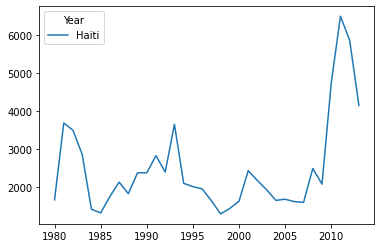

In [48]:
haiti.plot(kind='line')

In [49]:
df_CI = df_can.loc[['China', 'India'], years]

In [56]:
df_CI = df_CI.transpose()

In [57]:
df_CI.columns.name = 'Year'

In [58]:
df_CI.head()

Year,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


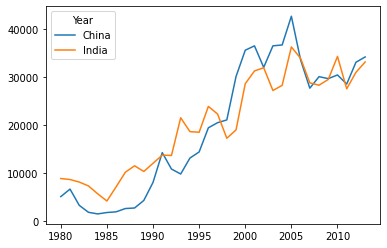

In [59]:
df_CI.plot(kind='line')

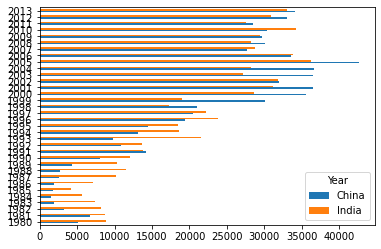

In [62]:
df_CI.plot(kind='barh')

In the above, we chose the year as the X variable. Now, consider the following
1. If Country is considered the X variable, then what charts are possible? 
2. If Y is a computed variable, not an existing column, then what charts are possible?
3. Finally finally, what if in line chart, we don't connect the lines - what is the resulting chart?

In summary, if we stick to this analogy, we can come up a good "grammar" for our pandas plotting that will it easier to productive when plotting in Pandas
* The independent variable X will be some kind of label in the x-axis (line charts, scatterplots, bar charts) or in the plot area itself (pie chart)

* The dependent variable Y will be the values in our y-axis or in the plot area itself (pie chart). They can be computed values - like the ones for histogram and pie chart - or an existing column in our dataset.